# Observation planning EY UMa

## Using astroplan to find out which nights an object is up

This notebook focuses on two broader questions:

1. Which times of year is it possible to observe the object of interest at a particular location?
2. On a particular date, which times of night is it best to observe the object of interest?

The python package [astroplan](https://astroplan.readthedocs.io) will be used to do all of the work here. As a result, much of this notebook will focus on the mechanics of how to do that rather than on background or theory.


## Run, but do not modify, the code in the cell below

None of the following cells will run until you have run the one below.

In [1]:
# Set plotting interface
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import dates
import numpy as np

# Load a couple of things needed from astroplan
from astroplan import Observer, FixedTarget
from astroplan.plots import plot_airmass, plot_finder_image

# And load Time from astropy
from astropy.time import Time

# Load astropy units module
import astropy.units as u

# Get the latest Earth orientation information...

from astroplan import download_IERS_A
#download_IERS_A()

Visibility depends on location, so the first step is to provide the location of the observatory. Notice that the longitude is given as degrees *east*; it should be a number between 0 and 360.

In [2]:
feder = Observer(latitude="46.86678d", longitude="263.54672d")

Everything done below can be doen for either a single object, as below, or for several objects at once. As a first example we will stick to one object, but an example with a couple of objects will be included at the end.

In [3]:
my_object = FixedTarget.from_name('ey uma')

## Plotting visibility over one night

In the [first notebook about observation planning](Observation Planning Resources.ipynb) the task was to check whether the object EY UMa, a RR Lyrae variable, was visible at 11PM CDT on Fri, Sep **15**, 2016. That was accomplished by checking how far above the horizon EY UMa was at that time. Here, the goal is to plot, over the course of an entire day, how high EY UMa is above the horizon.

Recall that the first step in providing a time is to convert it from local time to UTC. Central Daylight Time is five hours behind UTC, so to get to UTC, add five hours to 11PM CDT on Thu, Sep **15**, 2016.

Doing so gives 4AM on **Fri**, Sep **16**, 2016 UTC. This time is entered below in ISO format, though astropy does a pretty good job at interpreting sseveral formats.

In [4]:
obs_time = Time("2016-09-16 04:00:00", scale='utc')


>>> from astroplan import download_IERS_A
>>> download_IERS_A()
 [astroplan.utils]


Text(0.5, 1.0, 'ey uma')

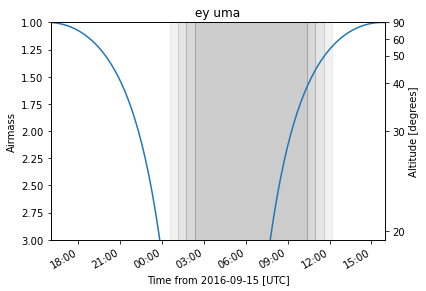

In [5]:
plot_airmass(my_object, feder, obs_time, brightness_shading=True, altitude_yaxis=True)
plt.title(my_object.name)

## Plot airmass over a large range of dates to make a rough choice of night

The cell immediately below this generates a list of dates, 5 days apart from each other, covering 365 days.

In [6]:
times = obs_time + np.arange(0, 365, 5) * u.day

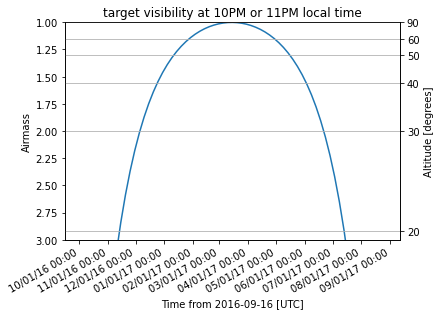

In [7]:
ax = plot_airmass(my_object, feder, times, altitude_yaxis=True)
plt.title('target visibility at 10PM or 11PM local time'.format(my_object.name))

plt.grid()

# Code below adds date to the horizontal axis
date_formatter = dates.DateFormatter('%D %H:%M')
ax.xaxis.set_major_formatter(date_formatter)

## Revising the plan

From the graph above it is clear that an obsevrvation date between roughly the beginning of December and late May would work better than September.

The plot below shows visibility over the night of Dec 1, 2016 at 11:59 CST. That is Dec **2**, 2016 at 06:00 UTC because the offset between Central *Standard* Time and UTC is 6 hours.

In [8]:
obs_time = Time("2020-12-02 05:59:00", scale='utc')

Text(0.5, 1.0, 'ey uma')

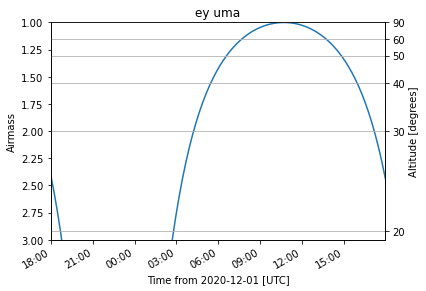

In [9]:
ax = plot_airmass(my_object, feder, obs_time, brightness_shading=False, altitude_yaxis=True)
plt.grid()
plt.title(my_object.name)

It appears EY UMa will be observable from roughly 4AM UTC (10PM CST on 12/1) until the sky begins to brighten at 12:00UTC (6AM CST)

## Creating a finding chart

A finding chart is simply a picture (or diagram) of the region of the sky surrounding the object of interest. The code below generates a chart for `my_object`. You can change the options in `plot_finder_image` to turn off the reticle, which marks the object of interest, or to turn off the grid.

In [ ]:
plt.figure(figsize=(10, 10))
ax, hdu = plot_finder_image(my_object, fov_radius=20 * u.arcmin, reticle=True, grid=True)